# Assignment 1

1. What’s the data and hidden parameter (or representation) in you problem?
2. What’s the generative process in your model (how the data in you model generated) and how to generate random data with program?
3. What’s the prior, likelihood, and posterior in your model?
4. How to calculate the likelihood with program?
5. How to calculate the posterior with program?
6. With a given data sample, what’s the posterior distribution looks like, and what’s the best estimation of hidden parameter?
7. If you use repeating test and take multiple samples, how does the posterior distribution evolves in the progress?

1. You have a bag, and there are two colors of balls, red and green. There are four types of bags, one with all red, one with all green, and one with 2/3 split of green and 1/3 red, the last is 2/3 of red and 1/3 green. The hidden variable is what kind of bag you get, and the data you get is the balls that you draw from that bag. 

2. To generate data, if it is the first or the second bag, it is entirely one color, whereas if you have the third or fourth bag you will have different amounts of red or green. The method below is how to generate a set of data with length elements.  

In [102]:
# Imported modules
import math
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [20]:
# Takes as input the probability that this bag has green, and 
# the number of balls that bag has.
def generateData(probGreen, length):
    data = []
    for x in range(length):
        if probGreen > 0 :
            rVel = (random.uniform(0,1) * 3)
        elif probGreen == 1:
            rVel = 0
        else:
            rVel = 1

        # 0 is green, 1 is red
        if rVel < 3 * probGreen:
            data.append(0)
        else:
            data.append(1)
        
    return data


3.
The prior of the bags are as follows. For bag 1, with 100% green, bag 2, with 2/3 green, bag 3 with 1/3 green, and bag 4, with no green, only red. The prior distribution for these bags is <.1, .4, .4, .1>. 

The likelihood of the data is assumed to be independently and identically distributed for each ball draw from the bag, thus we can say the likelihood of the data, given a bag, can be calculated using $ P( \mathbf Data| Bag) = \prod P(Draw | Bag)$. 

For each bag, we use the distribution of green to red to then determine the probability of a certain bag given a draw, i.e. if we draw a green ball, there is a 100% chance of drawing a green from bag 1, 2/3 from 2, and so on. 

The posterior is $ P(Bag|\mathbf Data) = \alpha P(\mathbf Data|Bag)P(Bag)$

4.
For calculating the likelihood with the program, that is below, with a comment above the loop for execution.

5.
For calculating the posterior, that is also in the method below, with comments above the relevant portion.

In [21]:
# program to calculate the probabilities of having a bag given the data.
def bagProbabilities(dataH):
    
    #priors and probabilities of each bag
    #Updated through iterations of the loops
    prior = [.1, .4, .4, .1]
    
    #The ratio of green to red
    #Also used for probability of drawing a green ball
    greenProb = [1, 2/3, 1/3, 0]
    
    #probability that you draw a certain ball from he bag
    totalBallProb = 0
    for z in range(4):
        totalBallProb = totalBallProb + (prior[z] * greenProb[z])
    
    # List for output
    priorPlot = [ [.1], [.4], [.4], [.1] ]
    greenProbPlot = [.5]

    for x in range(len(dataH)):
        #probability that a ball drawn is what it is given the data
        totalBallProb = 0

        #probability that you draw a lime
        totalBallProb = 0

        # Update the probability of drawing a certain ball 
        # P(Draw | Bag), summed over every bag. Resulting in P(Draw)
        #This is how you calculate the likelihood of the draw
        for z in range(4):
            # 1 is red, 0 is a green. P(Red) = 1 - P(Green)
            if(dataH[x] == 1):
                totalBallProb = totalBallProb + (prior[z] * (1 - greenProb[z]))
            else:
                totalBallProb = totalBallProb + (prior[z] * greenProb[z])

        # Converts the probability of drawing a ball to drawing green
        if(dataH[x] == 1):
            totalGreenProb = 1 - totalBallProb
        else:
            totalGreenProb = totalBallProb   

        # This is how you calculate the posterior,
        # Updating the prior to reflect the changes in draws.
        for y in range(4):
            if(dataH[x] == 1):
                prior[y] = (1 - greenProb[y]) * prior[y] / totalBallProb
            else:
                prior[y] = greenProb[y] * prior[y] / totalBallProb
            
            priorPlot[y].append(prior[y])

        #separate subplot to show the probability that next is green
        greenProbPlot.append(totalGreenProb)

    return priorPlot, greenProbPlot

6.
To generate a graph to view how the distributions look like, we can look at the probabilities of each bag after each draw from the bag. Here, we run the program with the data from having 2/3rds of the bag being green, the rest are red. We use the following function to graph. The best estimate of the hidden parameter is the bag that has the highest probability in the prior plot. 

In [39]:
def graphForBag(bag, priorPlot, greenProbPlot):
    
    prior = [.1, .4, .4, .1]
    limeProb = [1, 2/3, 1/3, 0]
    plotColor = ['ro', 'b^', 'gx', 'yp']
    '''    
    for z in range(4):
        plt.figure(bag)
        plt.subplot(121)
        
        #plt.plot(0, prior[z], plotColor[z], label='Bag {}'.format(z + 1))
        plt.subplot(122)
    '''

    plt.figure(bag)
    plt.subplot(121)
    plt.title('Data set having bag h{}'.format(bag + 1))
    
    for y in range(4):
        plt.plot(range(len(greenProbPlot)), priorPlot[y], plotColor[y], label='Bag {}'.format(y + 1))
    plt.legend()
    plt.subplot(122)
    plt.plot(range(len(greenProbPlot)), greenProbPlot, 'ko')
    plt.title('Probability next ball is green')

    
    plt.legend()

Below is the place to execute the final code, where you can determine the data to input and to actually call the methods created above.

In [91]:
# Change the probability of drawing a green ball here
bagType = 1
bagProbs = [1, 2/3, 1/3, 0]

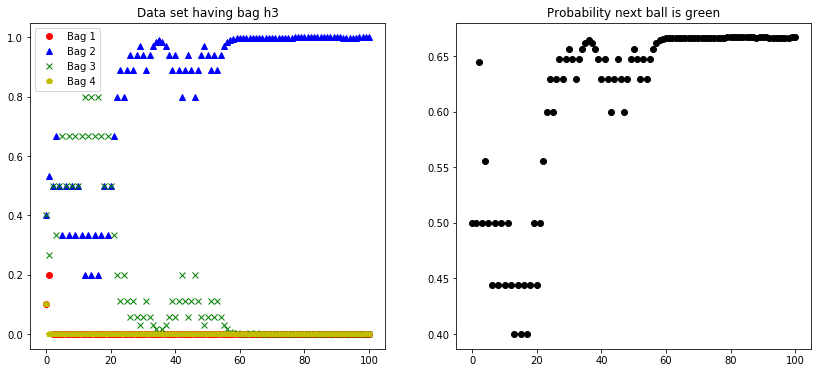

In [101]:
bagData = generateData(bagProbs[bagType], 100)
priorPlot, greenProbPlot = bagProbabilities(bagData)

# Makes the graphs larger and readable, x,  y in inches. Alter if this is too large or too small. 
matplotlib.rcParams['figure.figsize'] = 14, 6
graphForBag(2, priorPlot, greenProbPlot)